# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 5 - Use k-Means Clustering to Group Employees into Clusters

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling pickle file into a Pandas dataframe called churn_model2. **

In [3]:
churn_model2 = pd.read_pickle('../data/churn_modeling_data.pickle')

** Drop Churn target variable and include only predictor features in churn_model2 dataframe for k-means clustering. **

In [4]:
churn_pred_feat = churn_model2.drop(['Churn'], axis=1)

** Center and scale all predictor features. **

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
churn_pred_feat_scaled = scaler.fit_transform(churn_pred_feat)

** Using scaled predictor features, determine how many clusters will yield the highest silhouette score combined with the lowest possible inertia. **

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [8]:
k_range2 = range(2, 11)

sil_scores1 = []
clus_inertia1 = []

for k in k_range2:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(churn_pred_feat_scaled)
    sil_scores1.append(metrics.silhouette_score(churn_pred_feat_scaled, km.labels_).round(3))
    clus_inertia1.append(km.inertia_.round(3))
    
print(sil_scores1)
print(clus_inertia1)

[0.165, 0.182, 0.18, 0.178, 0.161, 0.142, 0.155, 0.157, 0.145]
[12584.437, 11155.616, 10019.114, 9222.795, 8757.186, 8395.91, 8009.325, 7749.454, 7508.134]


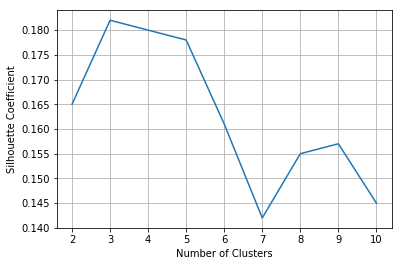

In [9]:
plt.plot(k_range2, sil_scores1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

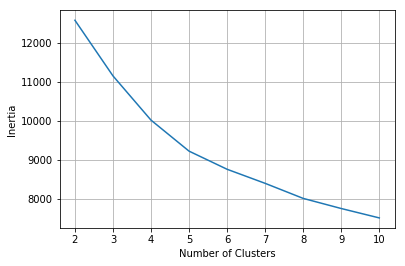

In [10]:
plt.plot(k_range2, clus_inertia1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

* The employees in the churn dataframe can be grouped into 3 clusters using k-means clustering and features for predicting churn.

** Group employees in churn_model2 dataframe into 3 clusters. **

In [11]:
kmeans_3s = KMeans(n_clusters=3, random_state=1)
kmeans_3s.fit(churn_pred_feat_scaled)
churn_pred_feat['cluster'] = kmeans_3s.labels_
churn_pred_feat.sort_values('cluster').head()

,Age,BusTravLevel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,Overtime_Dum,Sales_Rep,Single,StockOptionLevel,cluster
1087,34,1,7,1,2,2308,1,1,0,1,0
1308,38,1,2,1,0,5405,1,1,0,2,0
1391,38,1,1,0,1,2858,0,1,1,0,0
697,29,2,20,2,2,2157,0,1,0,1,0
238,32,1,4,2,2,3931,0,1,0,1,0


** Inspect cluster traits by calculating cluster centers as mean of features for predicting churn. **

In [12]:
churn_pred_feat.sort_values('cluster')
churn_pred_feat.groupby('cluster').mean()

,Age,BusTravLevel,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,Overtime_Dum,Sales_Rep,Single,StockOptionLevel
cluster,,,,,,,,,,
0,30.361446,1.216867,8.662651,1.734940,1.650602,2626.00000,0.289157,1.0,0.457831,0.626506
1,37.899476,1.072251,9.356021,1.716230,1.752880,6985.93089,0.287958,0.0,0.000000,1.167539
2,36.027778,1.092593,8.932870,1.731481,1.694444,6180.06250,0.270833,0.0,1.000000,0.000000


** Obtain number of employees for each cluster. **

In [13]:
churn_pred_feat.cluster.value_counts()

1    955
2    432
0     83
Name: cluster, dtype: int64